In [89]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
allgsdf = pd.read_csv("../../resources/20180622processedGoldStandardTopics.tsv.gz", delimiter="\t")
gsdf = allgsdf.drop(["title", "abstract", "major_mesh", "minor_mesh"], axis=1)

In [47]:
resdf = pd.read_csv("../../results/genedispbnb.trec_results", delimiter="\t", names=["topic", "Q0", "docid", "rank", "score", "run"])

In [98]:
infos = {}
for topic in set(gsdf["trec_topic_number"]):
    gsreldocs      = set(gsdf.query("trec_topic_number == " + str(topic) +" and relevance_score > 0")["trec_doc_id"])
    res4topic      = resdf.query("topic == " + str(topic) + "")
    allfoundseries = res4topic["docid"]
    resdocs        = set(allfoundseries)
    info = {}
    info["topic"]       = topic
    info["rel"]         = gsreldocs
    info["relfound"]    = gsreldocs.intersection(resdocs)
    info["relnotfound"] = gsreldocs.difference(resdocs)
    info["allranks"]    = list(res4topic["rank"])
    infos[topic] = info


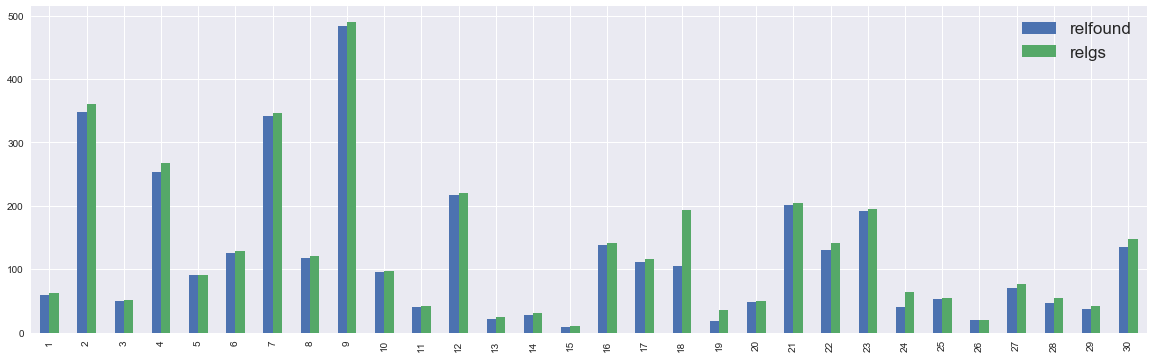

In [127]:
allfound = []
relfound = []
relgs    = []
for topic in sorted(infos.keys()):
    info = infos[topic]
    relfound.append(len(info["relfound"]))
    relgs.append(len(info["rel"]))

df =  pd.DataFrame({"relfound": relfound, "relgs":relgs})
df.index = pd.Index(range(1,31))
axes =df.plot(kind="bar",figsize=(20,6))
axes.legend(prop={'size': 17})


In [ ]:
pd.DataFrame({"relfound": relfound, "relgs":relgs}).plot

In [50]:
reltop5 = gsdf.query("trec_topic_number == 5 and relevance_score > 0").sort_values("relevance_score", ascending=False)
rest5   = resdf.query("topic == 5")
cols = ["trec_topic_number", "trec_doc_id", "pm_rel_desc", "disease_desc", "gene1_annotation_desc", "gene1_name", "gene2_annotation_desc", "gene2_name", "relevance_score"]
pd.merge(reltop5[cols], rest5, left_on="trec_doc_id", right_on="docid", how="left").sort_values("rank", ascending=True)

,trec_topic_number,trec_doc_id,pm_rel_desc,disease_desc,gene1_annotation_desc,gene1_name,gene2_annotation_desc,gene2_name,relevance_score,topic,Q0,docid,rank,score,run
41,5,25407517,Human PM,Exact,Exact,BRAF (V600E),Missing Gene,CDKN2A Deletion,2,5,Q0,25407517,1,111.230186,genedispbnb
7,5,23403819,Human PM,Exact,Exact,BRAF (V600E),Missing Gene,CDKN2A Deletion,2,5,Q0,23403819,2,96.344284,genedispbnb
34,5,26924424,Human PM,Exact,Exact,BRAF (V600E),Missing Gene,CDKN2A Deletion,2,5,Q0,26924424,5,87.982727,genedispbnb
35,5,26600396,Human PM,Exact,Exact,BRAF (V600E),Missing Gene,CDKN2A Deletion,2,5,Q0,26600396,7,86.931015,genedispbnb
2,5,24535907,Human PM,Exact,Exact,BRAF (V600E),Missing Gene,CDKN2A Deletion,2,5,Q0,24535907,12,84.935699,genedispbnb
18,5,21635872,Human PM,Exact,Exact,BRAF (V600E),Missing Gene,CDKN2A Deletion,2,5,Q0,21635872,16,84.486534,genedispbnb
43,5,AACR_2016-1138,Human PM,Exact,Exact,BRAF (V600E),Missing Gene,CDKN2A Deletion,2,5,Q0,AACR_2016-1138,19,83.977386,genedispbnb
17,5,21639808,Human PM,Exact,Exact,BRAF (V600E),Missing Gene,CDKN2A Deletion,2,5,Q0,21639808,20,83.548668,genedispbnb
10,5,22535154,Human PM,Exact,Exact,BRAF (V600E),Missing Gene,CDKN2A Deletion,2,5,Q0,22535154,29,81.909706,genedispbnb
3,5,24471189,Human PM,Exact,Exact,BRAF (V600E),Missing Gene,CDKN2A Deletion,2,5,Q0,24471189,30,81.904175,genedispbnb
